# Exploratory Data Analysis 3

In [2]:
import pandas as pd
# Load CSV files
zillow_df = pd.read_csv('/Users/abhaychaudhary/Desktop/zillow_CA_mean.csv')

In [ ]:
# Keeping only the zipcode and 2018-2021 columns
columns_to_keep = ['zipcode', 'State', 'CountyName', 'City' ,'2018', '2019', '2020', '2021']
CA_df_filtered = zillow_df[columns_to_keep]

# Calculate mean across 2018-2021
CA_df_filtered['mean_2018_2021'] = CA_df_filtered[['2018', '2019', '2020', '2021']].mean(axis=1)

CA_df_filtered['percent_increase_2018_2021'] = (
    ((CA_df_filtered['2021'] - CA_df_filtered['2018']) / CA_df_filtered['2018']) * 100
).round(2)

CA_df_filtered.to_csv('CA_df_filtered.csv', index=False)

print("CSV created successfully as 'CA_df_filtered.csv'")


CSV created successfully as 'CA_df_filtered.csv'


/var/folders/2y/clrtzxvn6c753s49pbsd5t_m0000gn/T/ipykernel_16676/2788119614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_df_filtered['mean_2018_2021'] = CA_df_filtered[['2018', '2019', '2020', '2021']].mean(axis=1)
/var/folders/2y/clrtzxvn6c753s49pbsd5t_m0000gn/T/ipykernel_16676/2788119614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_df_filtered['percent_increase_2018_2021'] = (


In [ ]:
# Looping through all CSV files
for file_path in glob.glob(os.path.join(data_folder, '*.csv')):
    df = pd.read_csv(file_path)

    # Finding the ZIP code column
    zip_col = next((col for col in df.columns if col in zip_variants), None)
    
    if zip_col is None:
        print(f"No ZIP code column found in {file_path}")
        continue

    # Renaming it to 'zipcode'
    df = df.rename(columns={zip_col: 'zipcode'})

    filename = os.path.basename(file_path)
    output_path = os.path.join(output_folder, filename)
    df.to_csv(output_path, index=False)
    print(f"Processed and saved: {output_path}")

Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/percent_white_population_yearly.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/fair_plan.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/premiuns_yearly.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/yearly_median_income_by_zip.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/cleaned_climate_disasters.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/zillow_CA_df_filtered_agg.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/yearly_lowest_income_by_zip.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/premiuns_totals.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/renewals_totals.csv


In [ ]:
# # Checking the columns of the first few files manually
# for file in glob.glob(os.path.join(output_folder, '*.csv'))[:5]:  # Inspect first 5 files
#     df = pd.read_csv(file)
#     print(f"Columns in {file}: {df.columns}")

Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/percent_white_population_yearly.csv: Index(['zipcode', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')
Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/fair_plan.csv: Index(['Unnamed: 0', 'zipcode', 'Voluntary Market Units', 'FAIR Plan Units',
       'Total Ins Units', 'Pct Market', 'Pct FAIR'],
      dtype='object')
Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/premiuns_yearly.csv: Index(['Unnamed: 0', 'Year', 'zipcode', 'Earned Premium'], dtype='object')
Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/yearly_median_income_by_zip.csv: Index(['zipcode', 'Median_Income_2017', 'Median_Income_2018',
       'Median_Income_2019', 'Median_Income_2020', 'Median_Income_2021',
       'Median_Income_2022', 'Median_Income_2023'],
      dtype='object')
Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlinin

In [ ]:
# # Ensuring output folder exists
# os.makedirs(output_folder, exist_ok=True)

# # Function to load CSVs, remove 'Unnamed: 0', and add a prefix based on the filename
# def load_and_prefix_csv(filepath, zip_col='zipcode', prefix=None):
#     df = pd.read_csv(filepath)
    
#     # Drop the 'Unnamed: 0' column if it exists
#     if 'Unnamed: 0' in df.columns:
#         df = df.drop(columns=['Unnamed: 0'])
#         print(f"Removed 'Unnamed: 0' from {filepath}")
    
#     # Check if ZIP code column exists before renaming
#     zip_col_in_file = next((col for col in df.columns if col.lower() == zip_col), None)
    
#     if zip_col_in_file is None:
#         print(f"Warning: ZIP code column not found in file: {filepath}")
    
#     # Use filename as prefix if not provided
#     if prefix is None:
#         prefix = os.path.splitext(os.path.basename(filepath))[0]
    
#     # Rename all columns except 'zipcode'
#     df = df.rename(columns={col: f"{prefix}_{col}" if col != zip_col else col for col in df.columns})
    
#     return df

# # Merge all CSVs on 'zipcode'
# merged_df = None
# for file in glob.glob(os.path.join(output_folder, '*.csv')):
#     df = load_and_prefix_csv(file)
    
#     # If it's the first file, set the merged_df to the current file
#     if merged_df is None:
#         merged_df = df
#     else:
#         # Merge on 'zipcode' using an outer join
#         merged_df = pd.merge(merged_df, df, on='zipcode', how='outer')  # Keep all ZIP codes from all datasets

# # Ensure ZIP code formatting (pad to 5 digits)
# merged_df['zipcode'] = merged_df['zipcode'].astype(str).str.zfill(5)

# # Save the merged data
# output_path = os.path.join(output_folder, 'merged_data.csv')
# merged_df.to_csv(output_path, index=False)
# print(f"Merged data saved to: {output_path}")

Removed 'Unnamed: 0' from /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/fair_plan.csv
Removed 'Unnamed: 0' from /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/premiuns_yearly.csv
Removed 'Unnamed: 0' from /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/renewals_totals.csv
Merged data saved to: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/merged_data.csv


In [ ]:
# merged_df.head()

,zipcode,percent_white_population_yearly_2017,percent_white_population_yearly_2018,percent_white_population_yearly_2019,percent_white_population_yearly_2020,percent_white_population_yearly_2021,percent_white_population_yearly_2022,percent_white_population_yearly_2023,fair_plan_Voluntary Market Units,fair_plan_FAIR Plan Units,...,premiuns_totals_2023,premiuns_totals_Pct Premium Increase 18-21,renewals_totals_New,renewals_totals_Renewed,renewals_totals_Expiring,renewals_totals_Insured-Initiated Nonrenewed,renewals_totals_Insurer-Initiated Nonrenewed,renewals_totals_Pct NonRenewed,renewals_totals_Pct NonRenewed Owner,renewals_totals_Pct NonRenewed Company
0,90001,51.8,51.4,51.3,47.8,43.7,39.6,35.4,6913.0,2104.0,...,851829.0,0.315258,5348.0,37886.0,42472.0,2974.0,1612.0,0.107977,0.070023,0.037954
1,90001,51.8,51.4,51.3,47.8,43.7,39.6,35.4,6913.0,2104.0,...,851829.0,0.315258,5348.0,37886.0,42472.0,2974.0,1612.0,0.107977,0.070023,0.037954
2,90001,51.8,51.4,51.3,47.8,43.7,39.6,35.4,6913.0,2104.0,...,851829.0,0.315258,5348.0,37886.0,42472.0,2974.0,1612.0,0.107977,0.070023,0.037954
3,90001,51.8,51.4,51.3,47.8,43.7,39.6,35.4,6913.0,2104.0,...,851829.0,0.315258,5348.0,37886.0,42472.0,2974.0,1612.0,0.107977,0.070023,0.037954
4,90001,51.8,51.4,51.3,47.8,43.7,39.6,35.4,6913.0,2104.0,...,851829.0,0.315258,5348.0,37886.0,42472.0,2974.0,1612.0,0.107977,0.070023,0.037954


In [ ]:
# merged_df.columns

Index(['zipcode', 'percent_white_population_yearly_2017',
       'percent_white_population_yearly_2018',
       'percent_white_population_yearly_2019',
       'percent_white_population_yearly_2020',
       'percent_white_population_yearly_2021',
       'percent_white_population_yearly_2022',
       'percent_white_population_yearly_2023',
       'fair_plan_Voluntary Market Units', 'fair_plan_FAIR Plan Units',
       'fair_plan_Total Ins Units', 'fair_plan_Pct Market',
       'fair_plan_Pct FAIR', 'premiuns_yearly_Year',
       'premiuns_yearly_Earned Premium',
       'yearly_median_income_by_zip_Median_Income_2017',
       'yearly_median_income_by_zip_Median_Income_2018',
       'yearly_median_income_by_zip_Median_Income_2019',
       'yearly_median_income_by_zip_Median_Income_2020',
       'yearly_median_income_by_zip_Median_Income_2021',
       'yearly_median_income_by_zip_Median_Income_2022',
       'yearly_median_income_by_zip_Median_Income_2023',
       'cleaned_climate_disasters_D

In [ ]:
import pandas as pd
import numpy as np
import os


merged_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/merged_data.csv')


merged_df['zipcode'] = merged_df['zipcode'].astype(str).str.zfill(5)

print(merged_df.dtypes)
print(merged_df.head())

zipcode                                            object
percent_white_population_yearly_2017              float64
percent_white_population_yearly_2018              float64
percent_white_population_yearly_2019              float64
percent_white_population_yearly_2020              float64
percent_white_population_yearly_2021              float64
percent_white_population_yearly_2022              float64
percent_white_population_yearly_2023              float64
fair_plan_Voluntary Market Units                  float64
fair_plan_FAIR Plan Units                         float64
fair_plan_Total Ins Units                         float64
fair_plan_Pct Market                              float64
fair_plan_Pct FAIR                                float64
premiuns_yearly_Year                              float64
premiuns_yearly_Earned Premium                    float64
yearly_median_income_by_zip_Median_Income_2017    float64
yearly_median_income_by_zip_Median_Income_2018    float64
yearly_median_

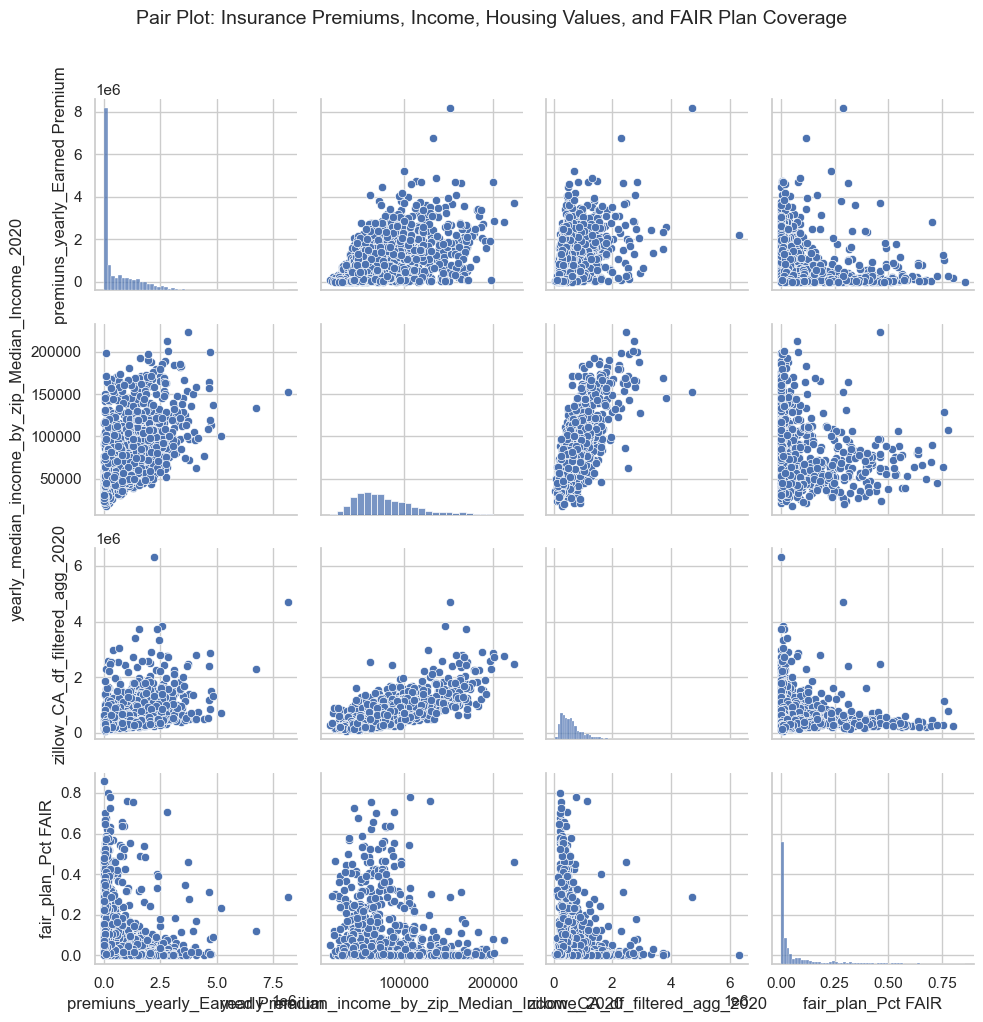

In [38]:
# Create pair plot to visualize relationships between Insurance Premiums, Income, Housing Values, and FAIR Plan Coverage
sns.pairplot(grouped_df[['premiuns_yearly_Earned Premium', 
                         'yearly_median_income_by_zip_Median_Income_2020', 
                         'zillow_CA_df_filtered_agg_2020', 
                         'fair_plan_Pct FAIR']])

plt.suptitle('Pair Plot: Insurance Premiums, Income, Housing Values, and FAIR Plan Coverage', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [40]:
import statsmodels.api as sm
import numpy as np

# Step 1: Clean the Data

# Handle missing values
# Option 1: Drop rows with missing values in the predictors and target
grouped_df_clean = grouped_df.dropna(subset=['premiuns_yearly_Earned Premium', 
                                              'zillow_CA_df_filtered_agg_2020', 
                                              'yearly_median_income_by_zip_Median_Income_2020', 
                                              'fair_plan_Pct FAIR'])

# Alternatively, you could replace missing values with the mean (or median)
# grouped_df_clean = grouped_df.fillna(grouped_df.mean())

# Step 2: Check for infinite values
grouped_df_clean = grouped_df_clean[~grouped_df_clean.isin([np.inf, -np.inf]).any(axis=1)]

# Step 3: Define independent variables (X) and dependent variable (y)
X = grouped_df_clean[['zillow_CA_df_filtered_agg_2020', 
                      'yearly_median_income_by_zip_Median_Income_2020', 
                      'fair_plan_Pct FAIR']]
y = grouped_df_clean['premiuns_yearly_Earned Premium']

# Add constant term to the model (for intercept)
X = sm.add_constant(X)

# Step 4: Fit the Multiple Linear Regression Model
model = sm.OLS(y, X).fit()

# Step 5: View the Summary
print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     premiuns_yearly_Earned Premium   R-squared:                       0.241
Model:                                        OLS   Adj. R-squared:                  0.239
Method:                             Least Squares   F-statistic:                     149.7
Date:                            Fri, 13 Jun 2025   Prob (F-statistic):           2.87e-84
Time:                                    15:17:23   Log-Likelihood:                -21335.
No. Observations:                            1419   AIC:                         4.268e+04
Df Residuals:                                1415   BIC:                         4.270e+04
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                                                     coef    std err          t      P>|t|

No data found for year 2015. Skipping...
No data found for year 2016. Skipping...
No data found for year 2017. Skipping...
No data found for year 2018. Skipping...
No data found for year 2019. Skipping...


<Figure size 1000x800 with 0 Axes>

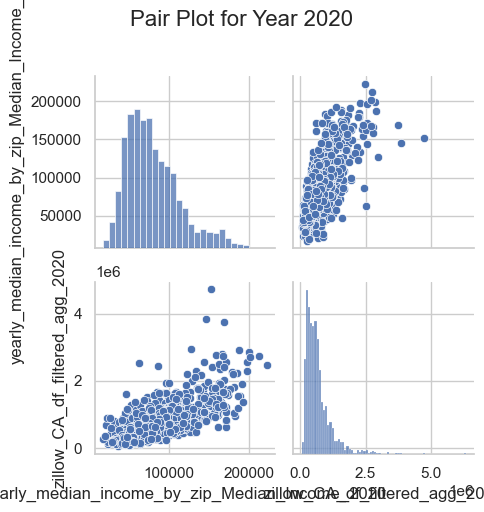

No data found for year 2021. Skipping...
No data found for year 2022. Skipping...
No data found for year 2023. Skipping...


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


variables = [
    'premiuns_yearly_Earned Premium',  # Insurance premiums
    'yearly_median_income_by_zip_Median_Income_2020',  # Income for 2020
    'fair_plan_Pct FAIR',  # FAIR plan percentage
    'zillow_CA_df_filtered_agg_2020'  # Housing values for 2020
]


for year in years:
    # Select relevant columns for this year
    year_columns = [var for var in variables if f"{year}" in var]
    
    # Check if we have any columns for the specific year
    if not year_columns:
        print(f"No data found for year {year}. Skipping...")
        continue
    
    # Add the year to the title and plot the pair plot
    plt.figure(figsize=(10, 8))
    sns.pairplot(grouped_df[year_columns])
    plt.suptitle(f'Pair Plot for Year {year}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


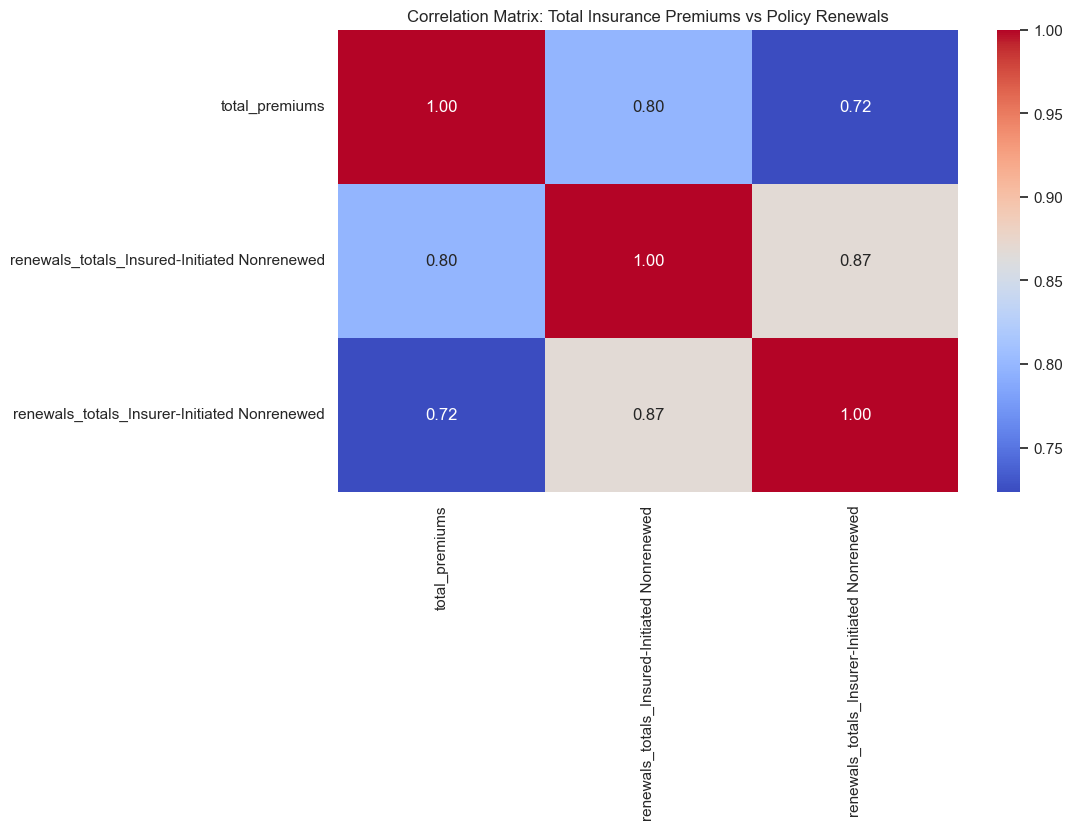

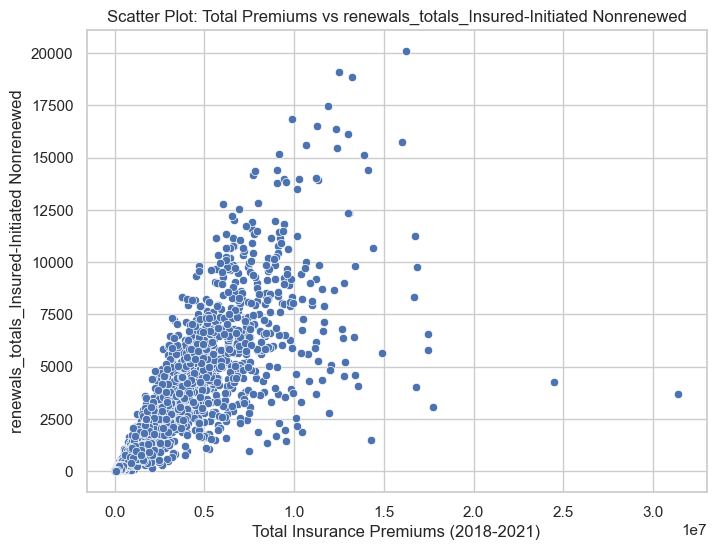

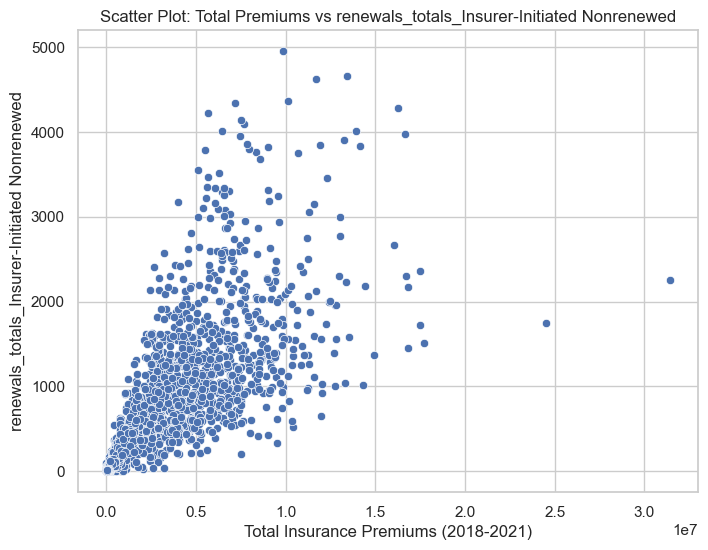

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'grouped_df' is your merged dataframe
# Step 1: Extract relevant columns for total premiums and non-renewals

# Total insurance premiums from 2018 to 2021
premium_columns = [
    'premiuns_totals_2018',
    'premiuns_totals_2019',
    'premiuns_totals_2020',
    'premiuns_totals_2021'
]

# Renewal columns for non-renewals (insurer-initiated and insured-initiated)
renewal_columns = [
    'renewals_totals_Insured-Initiated Nonrenewed',   # Insured non-renewed
    'renewals_totals_Insurer-Initiated Nonrenewed'   # Insurer non-renewed
]

# Step 2: Sum premiums over the years (2018-2021)
grouped_df['total_premiums'] = grouped_df[premium_columns].sum(axis=1)

# Step 3: Create a subset of data for the total premiums and the non-renewal columns
subset_df = grouped_df[['total_premiums'] + renewal_columns].dropna()

# Step 4: Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Step 5: Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix: Total Insurance Premiums vs Policy Renewals')
plt.show()

# Step 6: Visualize the relationship using scatter plots

# For each renewal column, plot against the total premiums
for renewal_col in renewal_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=subset_df['total_premiums'], y=subset_df[renewal_col])
    plt.title(f'Scatter Plot: Total Premiums vs {renewal_col}')
    plt.xlabel('Total Insurance Premiums (2018-2021)')
    plt.ylabel(renewal_col)
    plt.show()


In [46]:
# Check the first few rows of the dataframe to see the column names
print(grouped_df.columns)


Index(['zipcode', 'percent_white_population_yearly_2017',
       'percent_white_population_yearly_2018',
       'percent_white_population_yearly_2019',
       'percent_white_population_yearly_2020',
       'percent_white_population_yearly_2021',
       'percent_white_population_yearly_2022',
       'percent_white_population_yearly_2023',
       'fair_plan_Voluntary Market Units', 'fair_plan_FAIR Plan Units',
       'fair_plan_Total Ins Units', 'fair_plan_Pct Market',
       'fair_plan_Pct FAIR', 'premiuns_yearly_Year',
       'premiuns_yearly_Earned Premium',
       'yearly_median_income_by_zip_Median_Income_2017',
       'yearly_median_income_by_zip_Median_Income_2018',
       'yearly_median_income_by_zip_Median_Income_2019',
       'yearly_median_income_by_zip_Median_Income_2020',
       'yearly_median_income_by_zip_Median_Income_2021',
       'yearly_median_income_by_zip_Median_Income_2022',
       'yearly_median_income_by_zip_Median_Income_2023',
       'cleaned_climate_disasters_D

In [ ]:
# Manually defining column lists based on your dataset
premium_columns_yearly = [
    'premiuns_totals_2018', 'premiuns_totals_2019', 'premiuns_totals_2020', 'premiuns_totals_2021'
]

renewal_columns_yearly = [
    'renewals_totals_Insured-Initiated Nonrenewed', 
    'renewals_totals_Insurer-Initiated Nonrenewed'
]

demographics_columns_yearly = [
    'percent_white_population_yearly_2017', 'percent_white_population_yearly_2018', 
    'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020',
    'percent_white_population_yearly_2021', 'percent_white_population_yearly_2022', 
    'percent_white_population_yearly_2023'
]


Valid premium columns: ['premiuns_totals_2018', 'premiuns_totals_2019', 'premiuns_totals_2020', 'premiuns_totals_2021']
Valid renewal columns: ['renewals_totals_Insured-Initiated Nonrenewed', 'renewals_totals_Insurer-Initiated Nonrenewed']
Valid demographics columns: ['percent_white_population_yearly_2018', 'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020', 'percent_white_population_yearly_2021']


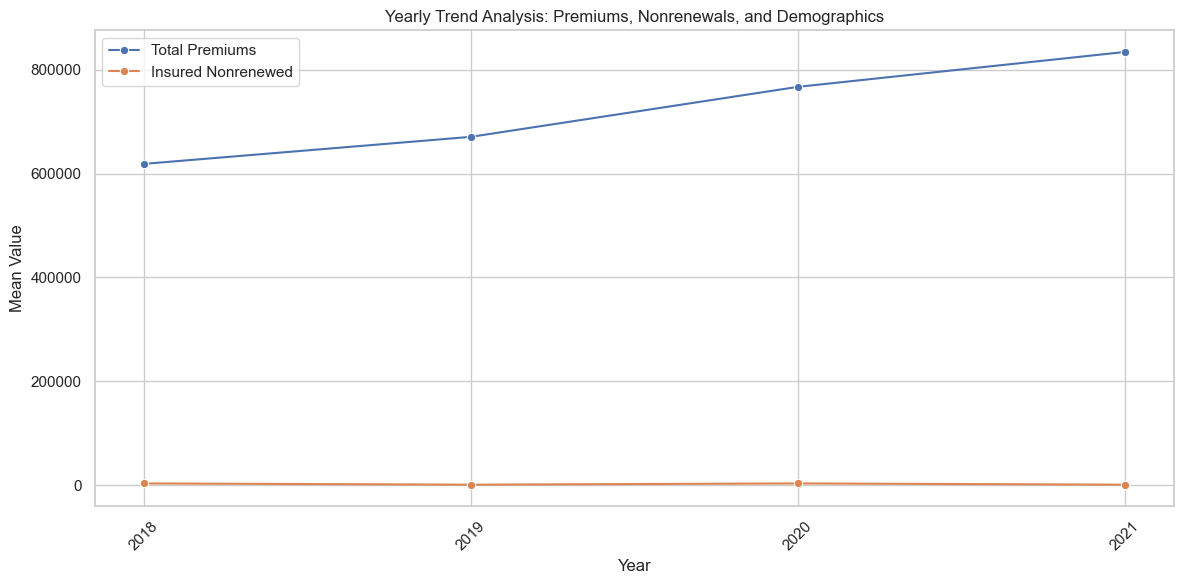

In [ ]:
# Defining columns for premiums, renewals, and demographics for 2018-2021
premium_columns_yearly = [
    'premiuns_totals_2018', 'premiuns_totals_2019', 'premiuns_totals_2020', 'premiuns_totals_2021'
]

renewal_columns_yearly = [
    'renewals_totals_Insured-Initiated Nonrenewed', 
    'renewals_totals_Insurer-Initiated Nonrenewed'
]

# Filtering the demographics columns to only include 2018-2021
demographics_columns_yearly = [
    'percent_white_population_yearly_2018', 
    'percent_white_population_yearly_2019', 
    'percent_white_population_yearly_2020', 
    'percent_white_population_yearly_2021'
]

# Creating lists to store the valid columns after checking existence in the grouped dataframe
valid_premium_columns = []
valid_renewal_columns = []
valid_demographics_columns = []


for col in premium_columns_yearly:
    if col in grouped_df.columns:
        valid_premium_columns.append(col)

for col in renewal_columns_yearly:
    if col in grouped_df.columns:
        valid_renewal_columns.append(col)

for col in demographics_columns_yearly:
    if col in grouped_df.columns:
        valid_demographics_columns.append(col)

# Print valid columns to confirm
print("Valid premium columns:", valid_premium_columns)
print("Valid renewal columns:", valid_renewal_columns)
print("Valid demographics columns:", valid_demographics_columns)

# Create a new DataFrame to store yearly trends for easier plotting
yearly_trends = pd.DataFrame({
    'Year': ['2018', '2019', '2020', '2021'],
    'Total Premiums': [
        grouped_df[valid_premium_columns[0]].mean() if len(valid_premium_columns) > 0 else None, 
        grouped_df[valid_premium_columns[1]].mean() if len(valid_premium_columns) > 1 else None,
        grouped_df[valid_premium_columns[2]].mean() if len(valid_premium_columns) > 2 else None,
        grouped_df[valid_premium_columns[3]].mean() if len(valid_premium_columns) > 3 else None
    ],
    'Insured Nonrenewed': [
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None,
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None
    ],
    'Insurer Nonrenewed': [
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None,
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None
    ],
    'White Population %': [
        grouped_df[valid_demographics_columns[0]].mean() if len(valid_demographics_columns) > 0 else None,
        grouped_df[valid_demographics_columns[1]].mean() if len(valid_demographics_columns) > 1 else None,
        grouped_df[valid_demographics_columns[2]].mean() if len(valid_demographics_columns) > 2 else None,
        grouped_df[valid_demographics_columns[3]].mean() if len(valid_demographics_columns) > 3 else None
    ]
})

# Plot the trends using Seaborn and Matplotlib
plt.figure(figsize=(12, 6))

# Plot each of the variables
sns.lineplot(x='Year', y='Total Premiums', data=yearly_trends, label='Total Premiums', marker='o')
sns.lineplot(x='Year', y='Insured Nonrenewed', data=yearly_trends, label='Insured Nonrenewed', marker='o')
sns.lineplot(x='Year', y='Insurer Nonrenewed', data=yearly_trends, label='Insurer Nonrenewed', marker='o')
sns.lineplot(x='Year', y='White Population %', data=yearly_trends, label='White Population %', marker='o')

# Customize the plot
plt.title('Yearly Trend Analysis: Premiums, Nonrenewals, and Demographics')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


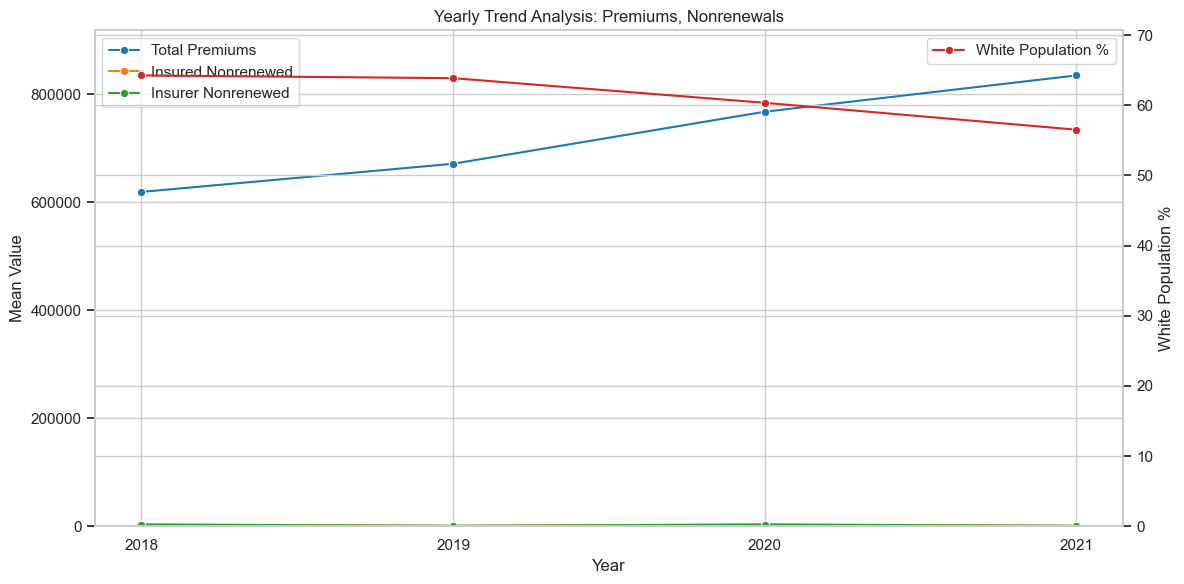

In [ ]:

plt.figure(figsize=(12, 6))

# Creating a primary axis for Premiums, Insured Nonrenewed, and Insurer Nonrenewed
ax1 = plt.gca()

# Plotting each of the variables on the primary axis (ax1)
sns.lineplot(x='Year', y='Total Premiums', data=yearly_trends, ax=ax1, label='Total Premiums', marker='o', color='tab:blue')
sns.lineplot(x='Year', y='Insured Nonrenewed', data=yearly_trends, ax=ax1, label='Insured Nonrenewed', marker='o', color='tab:orange')
sns.lineplot(x='Year', y='Insurer Nonrenewed', data=yearly_trends, ax=ax1, label='Insurer Nonrenewed', marker='o', color='tab:green')

# Customizing primary axis (ax1) labels and title
ax1.set_title('Yearly Trend Analysis: Premiums, Nonrenewals')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Value')

# Fixing the max value calculation: Find the maximum for each relevant column
ax1.set_ylim(0, max(
    yearly_trends['Total Premiums'].max(),
    yearly_trends['Insured Nonrenewed'].max(),
    yearly_trends['Insurer Nonrenewed'].max()
) * 1.1)  # Scaling by 10% for better visibility

ax1.legend(loc='upper left')

# Creating a secondary axis for White Population % (on the right side)
ax2 = ax1.twinx()

# Plotting White Population % on the secondary axis (ax2)
sns.lineplot(x='Year', y='White Population %', data=yearly_trends, ax=ax2, label='White Population %', marker='o', color='tab:red')

# Customizing secondary axis (ax2)
ax2.set_ylabel('White Population %')
ax2.set_ylim(0, yearly_trends['White Population %'].max() * 1.1)  # Scaling by 10% for better visibility
ax2.legend(loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


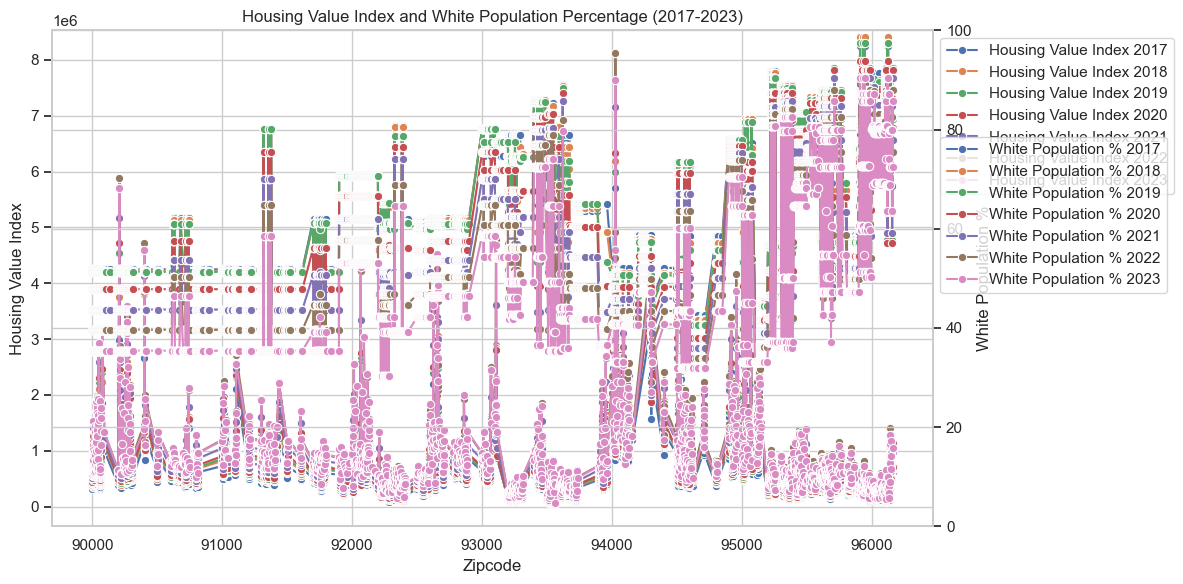

In [ ]:

# Selecting the relevant columns for the plot
housing_columns = ['zillow_CA_df_filtered_agg_2017', 'zillow_CA_df_filtered_agg_2018', 'zillow_CA_df_filtered_agg_2019', 
                   'zillow_CA_df_filtered_agg_2020', 'zillow_CA_df_filtered_agg_2021', 'zillow_CA_df_filtered_agg_2022', 
                   'zillow_CA_df_filtered_agg_2023']

white_population_columns = ['percent_white_population_yearly_2017', 'percent_white_population_yearly_2018', 
                            'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020', 
                            'percent_white_population_yearly_2021', 'percent_white_population_yearly_2022', 
                            'percent_white_population_yearly_2023']

plt.figure(figsize=(12, 6))


ax1 = plt.gca()


for year in range(2017, 2024):
    sns.lineplot(x='zipcode', y=f'zillow_CA_df_filtered_agg_{year}', data=merged_df, ax=ax1, label=f'Housing Value Index {year}', marker='o')


ax1.set_title('Housing Value Index and White Population Percentage (2017-2023)')
ax1.set_xlabel('Zipcode')
ax1.set_ylabel('Housing Value Index')


ax2 = ax1.twinx()


for year in range(2017, 2024):
    sns.lineplot(x='zipcode', y=f'percent_white_population_yearly_{year}', data=merged_df, ax=ax2, label=f'White Population % {year}', marker='o')


ax2.set_ylabel('White Population %')
ax2.set_ylim(0, 100)  # Ensuring the Y-axis for percentage is between 0 and 100%

ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.8))

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [55]:
# Calculate Pearson correlation between housing values and white population percentage
correlation = merged_df[housing_columns].corrwith(merged_df[white_population_columns])
print(correlation)


percent_white_population_yearly_2017   NaN
percent_white_population_yearly_2018   NaN
percent_white_population_yearly_2019   NaN
percent_white_population_yearly_2020   NaN
percent_white_population_yearly_2021   NaN
percent_white_population_yearly_2022   NaN
percent_white_population_yearly_2023   NaN
zillow_CA_df_filtered_agg_2017         NaN
zillow_CA_df_filtered_agg_2018         NaN
zillow_CA_df_filtered_agg_2019         NaN
zillow_CA_df_filtered_agg_2020         NaN
zillow_CA_df_filtered_agg_2021         NaN
zillow_CA_df_filtered_agg_2022         NaN
zillow_CA_df_filtered_agg_2023         NaN
dtype: float64


yearly_median_income_by_zip_Median_Income_2017    205235
yearly_median_income_by_zip_Median_Income_2018    205235
yearly_median_income_by_zip_Median_Income_2019    205235
yearly_median_income_by_zip_Median_Income_2020    205235
yearly_median_income_by_zip_Median_Income_2021    205235
renewals_totals_Pct NonRenewed                     90303
renewals_totals_Pct NonRenewed Owner               90303
percent_white_population_yearly_2017                 663
percent_white_population_yearly_2018                 663
percent_white_population_yearly_2019                 663
percent_white_population_yearly_2020                 663
percent_white_population_yearly_2021                 663
dtype: int64
                                                yearly_median_income_by_zip_Median_Income_2017  \
yearly_median_income_by_zip_Median_Income_2017                                        1.000000   
yearly_median_income_by_zip_Median_Income_2018                                        0.989338   
yearly_me

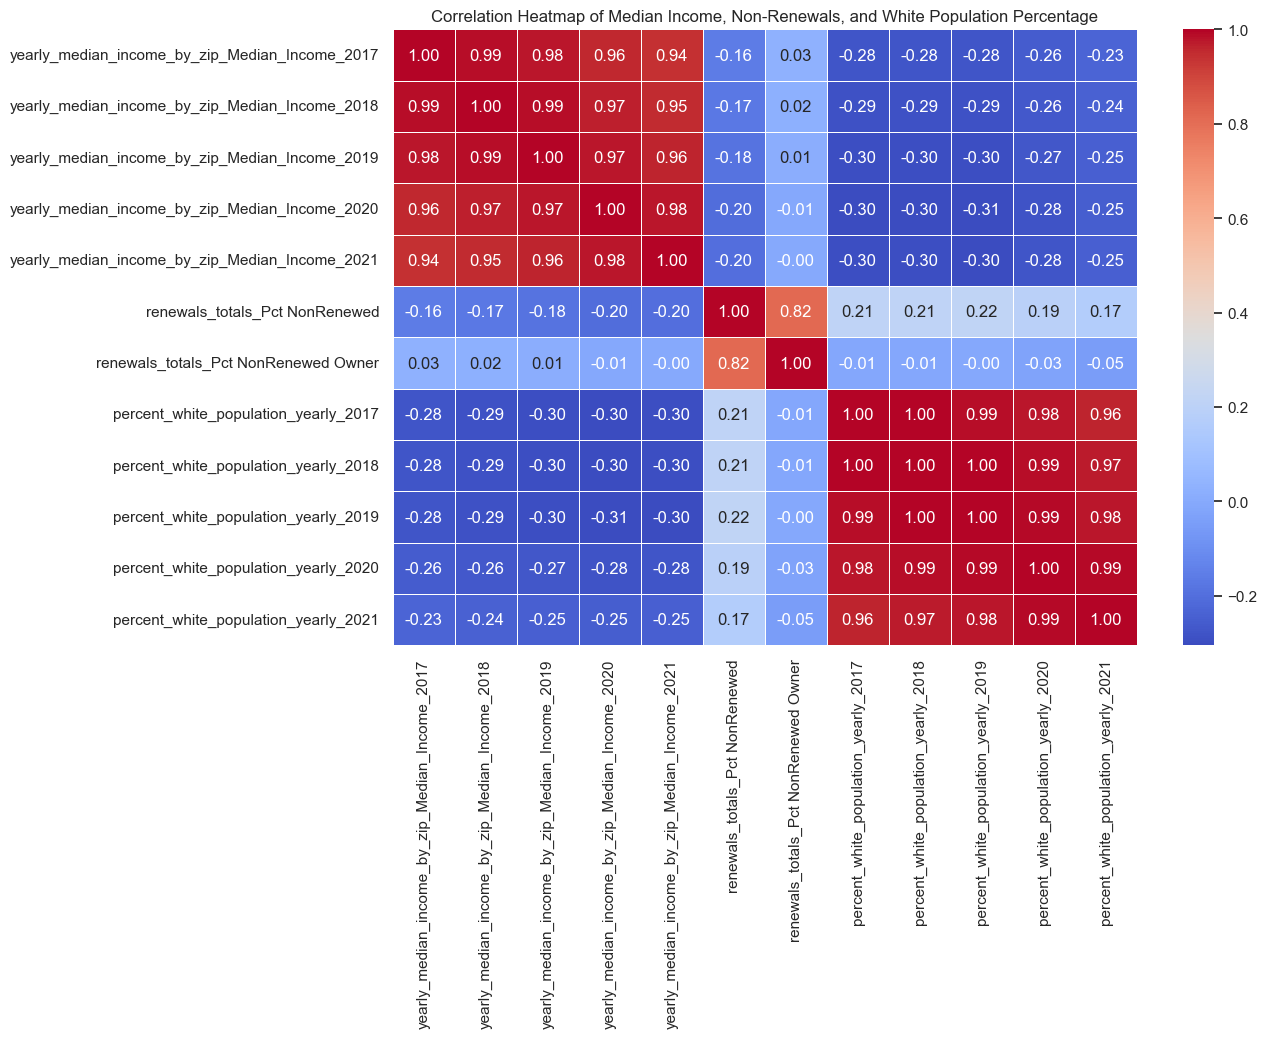

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns related to the analysis
income_columns = [ 
                  'yearly_median_income_by_zip_Median_Income_2017', 'yearly_median_income_by_zip_Median_Income_2018', 
                  'yearly_median_income_by_zip_Median_Income_2019', 'yearly_median_income_by_zip_Median_Income_2020', 
                  'yearly_median_income_by_zip_Median_Income_2021']

renewal_columns = ['renewals_totals_Pct NonRenewed', 'renewals_totals_Pct NonRenewed Owner']
white_population_columns = ['percent_white_population_yearly_2017', 'percent_white_population_yearly_2018', 
                            'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020', 
                            'percent_white_population_yearly_2021']

# Selecting the relevant columns for correlation analysis
relevant_columns = income_columns + renewal_columns + white_population_columns

# Subset the dataframe to only include the relevant columns
subset_df = merged_df[relevant_columns]

# Checking for missing values
print(subset_df.isna().sum())

# Dropingp rows with missing values for simplicity (you can also fill missing values if needed)
subset_df = subset_df.dropna()

# Correlation analysis between the variables
correlation_matrix = subset_df.corr()

# Printing the correlation matrix
print(correlation_matrix)

# Visualiinge the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Median Income, Non-Renewals, and White Population Percentage')
plt.show()



                                        aggregate_median_income  \
aggregate_median_income                                1.000000   
aggregate_white_population                            -0.283838   
Pct NonRenewed Owner                                   0.008632   
renewals_totals_Pct NonRenewed Company                -0.329032   

                                        aggregate_white_population  \
aggregate_median_income                                  -0.283838   
aggregate_white_population                                1.000000   
Pct NonRenewed Owner                                     -0.020310   
renewals_totals_Pct NonRenewed Company                    0.366936   

                                        Pct NonRenewed Owner  \
aggregate_median_income                             0.008632   
aggregate_white_population                         -0.020310   
Pct NonRenewed Owner                                1.000000   
renewals_totals_Pct NonRenewed Company              0.180

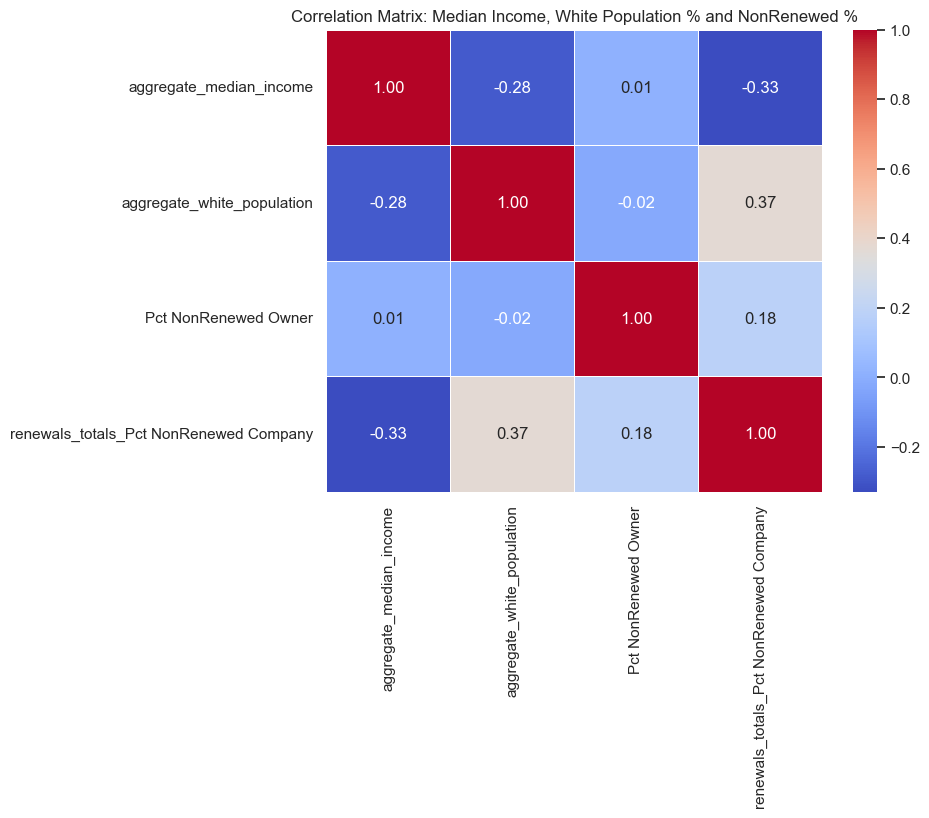

In [ ]:

# Columns related to the analysis
income_columns = [
    'yearly_median_income_by_zip_Median_Income_2017', 
    'yearly_median_income_by_zip_Median_Income_2018', 
    'yearly_median_income_by_zip_Median_Income_2019', 
    'yearly_median_income_by_zip_Median_Income_2020', 
    'yearly_median_income_by_zip_Median_Income_2021'
]

white_population_columns = [
    'percent_white_population_yearly_2017', 
    'percent_white_population_yearly_2018', 
    'percent_white_population_yearly_2019', 
    'percent_white_population_yearly_2020', 
    'percent_white_population_yearly_2021'
]

renewal_columns = [
    # 'renewals_totals_Pct NonRenewed', 
    'renewals_totals_Pct NonRenewed Owner',
    'renewals_totals_Pct NonRenewed Company',
]

# Aggregate the data by taking the mean across the years for median income and white population
agg_income = merged_df[income_columns].mean(axis=1)
agg_white_population = merged_df[white_population_columns].mean(axis=1)

# Select the relevant columns for correlation analysis (aggregated income, white population, nonrenewed data)
agg_data = pd.DataFrame({
    'aggregate_median_income': agg_income,
    'aggregate_white_population': agg_white_population,
    # 'Pct NonRenewed': merged_df['renewals_totals_Pct NonRenewed'],
    'Pct NonRenewed Owner': merged_df['renewals_totals_Pct NonRenewed Owner'],
    'renewals_totals_Pct NonRenewed Company' : merged_df['renewals_totals_Pct NonRenewed Company']
})

# Check for missing values and handle them
agg_data = agg_data.dropna()  # Drop rows with any missing values

# Compute the correlation matrix
correlation_matrix = agg_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Median Income, White Population % and NonRenewed %')
plt.show()
